In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from joblib import dump,load

In [3]:
nomefile='marziani.csv'
data=pd.read_csv(nomefile)
print(data.head)
print(">>>colonne: ",data.columns)
print(">>>tipi\n",data.dtypes)

<bound method NDFrame.head of      specie colore  n_arti  peso  altezza  larghezza
0     Robby  viola    20.0  3.87    14.77      73.22
1     Robby  viola    27.0  3.15    28.19      88.44
2     Robby  viola    25.0  4.35    12.05      76.74
3     Robby    blu    20.0  3.76     9.90      81.37
4     Robby    blu    28.0  2.86    19.87      84.65
...     ...    ...     ...   ...      ...        ...
1995  Simmy  viola    29.0  4.55    35.48      68.47
1996  Simmy    blu    23.0  3.84    29.86      71.51
1997  Simmy  viola    22.0  4.55    29.41      68.38
1998  Simmy  rosso    27.0  4.53    33.12      68.10
1999  Simmy  viola    23.0  5.10    18.88      64.95

[2000 rows x 6 columns]>
>>>colonne:  Index(['specie', 'colore', 'n_arti', 'peso', 'altezza', 'larghezza'], dtype='object')
>>>tipi
 specie        object
colore        object
n_arti       float64
peso         float64
altezza      float64
larghezza    float64
dtype: object


In [4]:
print(">>>Specie")
print(data["specie"].unique())
print(">>>Describe")
print(data["specie"].describe())

>>>Specie
['Robby' 'Simmy']
>>>Describe
count      2000
unique        2
top       Robby
freq       1000
Name: specie, dtype: object


In [5]:
for specie in data["specie"].unique():
    dati=data[data["specie"]==specie]
    print(">>",specie)
    for x in data.columns[1:]:
        print(dati[x].describe())

>> Robby
count     995
unique      3
top       blu
freq      340
Name: colore, dtype: object
count    999.000000
mean      24.637638
std        2.899248
min       20.000000
25%       22.000000
50%       25.000000
75%       27.000000
max       29.000000
Name: n_arti, dtype: float64
count    1000.000000
mean        3.500900
std         0.489139
min         2.130000
25%         3.170000
50%         3.490000
75%         3.830000
max         5.050000
Name: peso, dtype: float64
count    996.000000
mean      17.518082
std        4.227621
min        3.170000
25%       14.740000
50%       17.330000
75%       20.307500
max       29.400000
Name: altezza, dtype: float64
count    999.000000
mean      84.719429
std       11.456814
min       44.700000
25%       77.045000
50%       84.890000
75%       92.510000
max      117.450000
Name: larghezza, dtype: float64
>> Simmy
count       998
unique        3
top       rosso
freq        339
Name: colore, dtype: object
count    995.000000
mean      24.544724


In [6]:
colori =np.sort(data['colore'].dropna().unique())
print(colori)

['blu' 'rosso' 'viola']


In [7]:
d=data.copy()

for k in range(len(colori)):
    d['colore'].replace(colori[k],k,inplace=True)
d.head()

,specie,colore,n_arti,peso,altezza,larghezza
0,Robby,2.0,20.0,3.87,14.77,73.22
1,Robby,2.0,27.0,3.15,28.19,88.44
2,Robby,2.0,25.0,4.35,12.05,76.74
3,Robby,0.0,20.0,3.76,9.90,81.37
4,Robby,0.0,28.0,2.86,19.87,84.65


In [8]:
data["colore"].unique()

array(['viola', 'blu', 'rosso', nan], dtype=object)

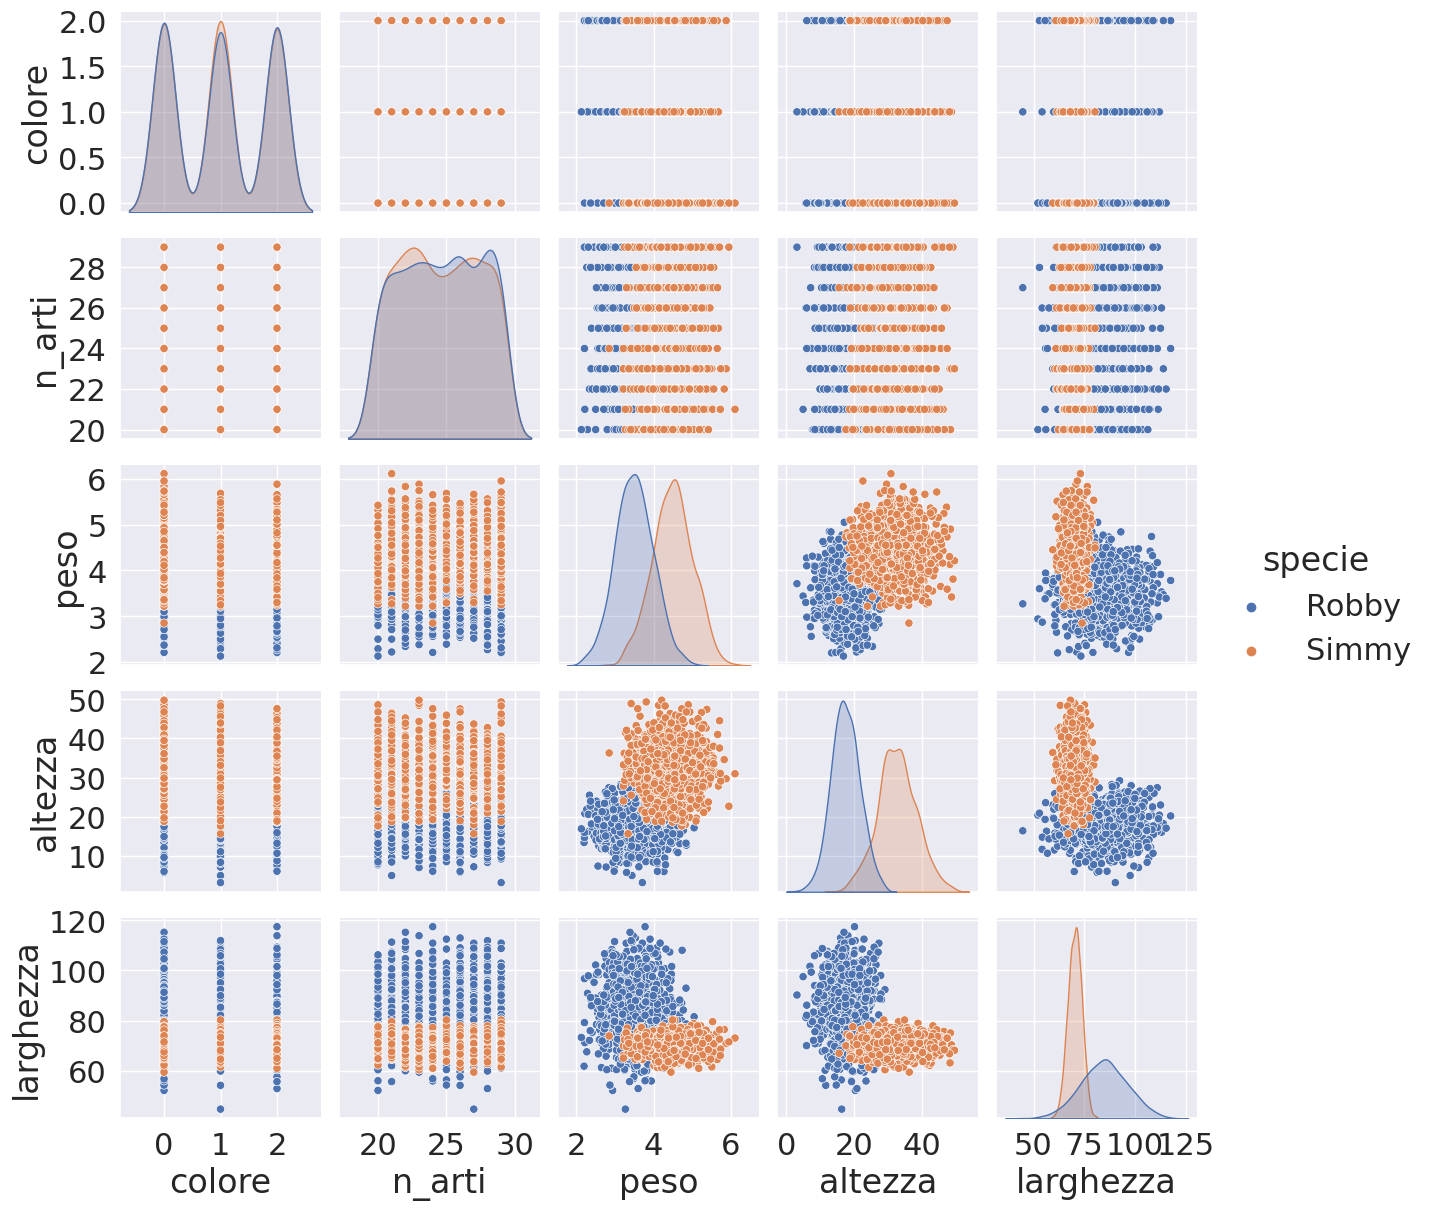

In [9]:
import seaborn as sns
sns.set_theme(font_scale=2)
sns.pairplot(d,hue='specie',dropna=True)
sns.set()

In [10]:
cols_with_missing=[col for col in d.columns if d[col].isnull().sum()]
cols_with_missing

['colore', 'n_arti', 'altezza', 'larghezza']

In [11]:
cols_selected=["peso","altezza","larghezza"]
d=data.dropna(axis='index',subset=cols_selected)
d.shape

(1992, 6)

In [12]:
[col for col in d.columns if d[col].isnull().sum()]

['colore', 'n_arti']

In [13]:
X=d[cols_selected]
y=d['specie']
print(X.head())
y.head()

   peso  altezza  larghezza
0  3.87    14.77      73.22
1  3.15    28.19      88.44
2  4.35    12.05      76.74
3  3.76     9.90      81.37
4  2.86    19.87      84.65


0    Robby
1    Robby
2    Robby
3    Robby
4    Robby
Name: specie, dtype: object

In [14]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X,y,train_size=0.7, random_state=0)
X_train

,peso,altezza,larghezza
1853,4.58,29.13,70.59
486,3.93,25.37,95.30
846,3.95,27.27,73.86
376,3.01,21.95,74.95
580,3.17,12.02,76.47
...,...,...,...
839,3.25,15.02,60.59
1221,4.16,29.37,70.01
1659,4.16,30.64,69.81
563,2.91,14.96,84.66


In [15]:
X_train.shape[0]

1394

In [16]:
Y_train.value_counts()

Simmy    710
Robby    684
Name: specie, dtype: int64

In [17]:
y_test.head()

1810    Simmy
1317    Simmy
965     Robby
109     Robby
1563    Simmy
Name: specie, dtype: object

In [18]:
pd.options.display.float_format='{:.3f}'.format

In [21]:
m=X_train.mean()
print(f">>Media: \n{m}")
s=X_train.std()
print(f">>Deviazione Standard: \n{s}")

X_train_std=((X_train-m)/s)
print(f">>X_train Normalizzato \n {X_train_std.describe()}")

>>Media: 
peso         3.995
altezza     25.276
larghezza   77.389
dtype: float64
>>Deviazione Standard: 
peso         0.708
altezza      9.173
larghezza   10.984
dtype: float64
>>X_train Normalizzato 
           peso  altezza  larghezza
count 1394.000 1394.000   1394.000
mean     0.000   -0.000     -0.000
std      1.000    1.000      1.000
min     -2.536   -2.410     -2.297
25%     -0.742   -0.863     -0.724
50%     -0.007   -0.117     -0.360
75%      0.755    0.846      0.667
max      2.988    2.572      3.444


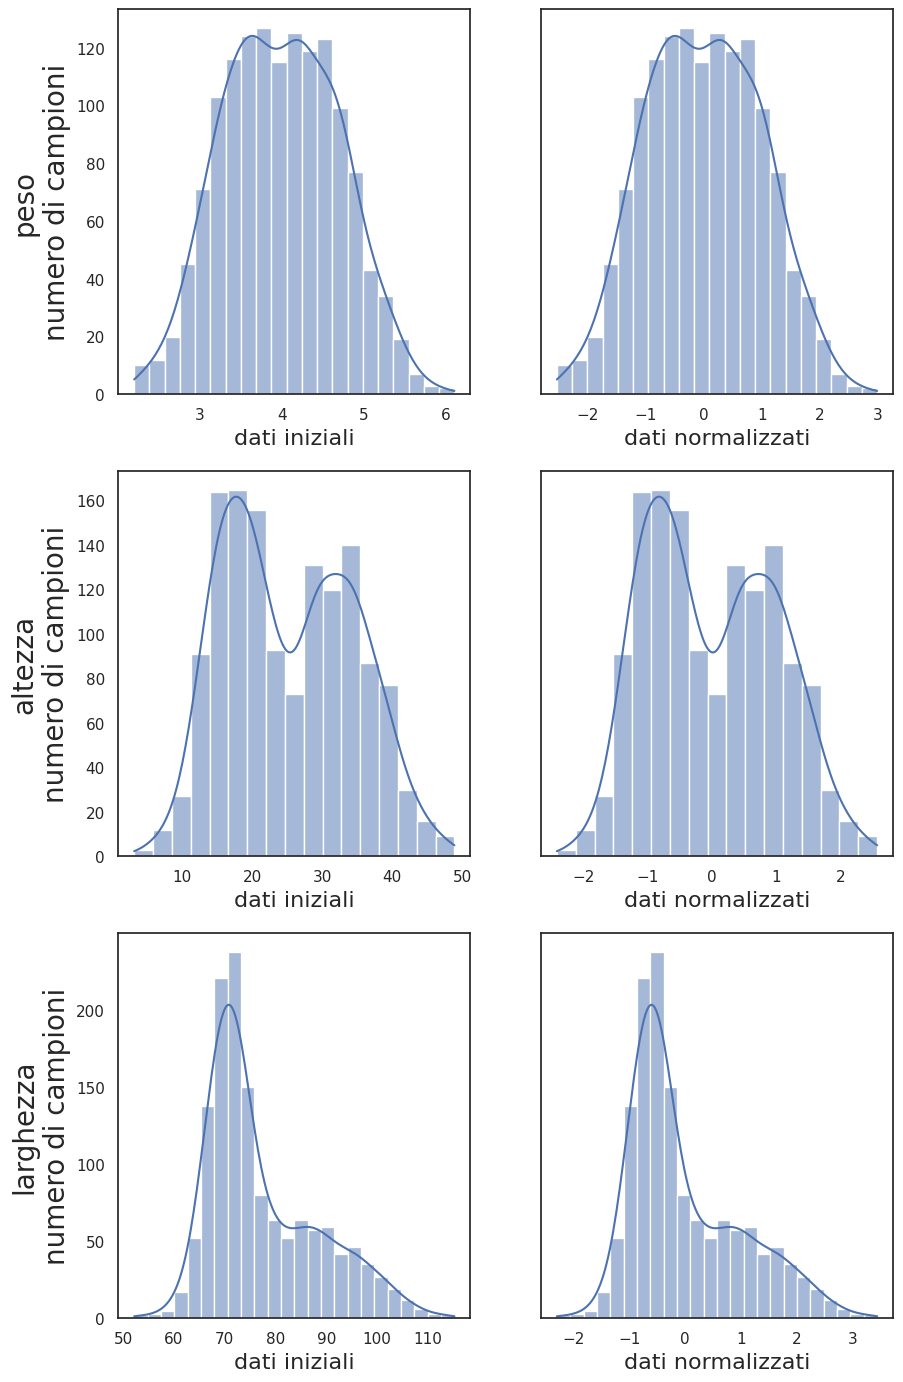

In [25]:
sns.set_style("white")
fig,axs=plt.subplots(3,2,figsize=(10,17),sharey="row")
for i,ax in enumerate(axs):
    col=cols_selected[i]
    ax[0].set_xlabel("dati iniziali",fontsize=16)
    ax[1].set_xlabel("dati normalizzati",fontsize=16)
    ax[0].set_ylabel(col+"\nnumero di campioni",fontsize=20)
    sns.histplot(ax=ax[0],x=X_train[col],kde=True)
    sns.histplot(ax=ax[1],x=X_train_std[col],kde=True)
sns.set()

In [28]:
X_test_std = ((x_test-m)/s)
print(f">>X test Normalizzato \n {X_test_std.describe()}")

pd.options.display.float_format=None

>>X test Normalizzato 
              peso     altezza   larghezza
count  598.000000  598.000000  598.000000
mean    -0.001165   -0.047546    0.025733
std      0.988214    0.987773    1.034883
min     -2.635013   -1.968437   -2.975920
25%     -0.741986   -0.876096   -0.718875
50%     -0.014441   -0.175122   -0.339931
75%      0.737825    0.739524    0.701082
max      2.380098    2.668019    3.647053


In [31]:
model =MLPClassifier(hidden_layer_sizes=(100,100),random_state=1, max_iter=300)
model

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, random_state=1)

In [32]:
model.fit(X_train_std,Y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, random_state=1)

In [33]:
print("Train")
print(Y_train.values[:5])
print(model.predict(X_train_std[:5]))

print("Test")
print(y_test.values[:5])
print(model.predict(X_test_std[:5]))

caso_std=(([4.8,31.4,70.8]-m)/s)
print("Caso")
print(model.predict([caso_std]))


Train
['Simmy' 'Robby' 'Robby' 'Robby' 'Robby']
['Simmy' 'Robby' 'Robby' 'Robby' 'Robby']
Test
['Simmy' 'Simmy' 'Robby' 'Robby' 'Simmy']
['Simmy' 'Simmy' 'Robby' 'Robby' 'Simmy']
Caso
['Simmy']


/home/raffaelem5b/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [36]:
print("Accuratezza dati di TRAIN: %.3f" % model.score(X_train_std,Y_train))
predictions=model.predict(X_test_std)
score=accuracy_score(y_test,predictions)
print("Accuratezza dati di TEST: %.3f" % score)


Accuratezza dati di TRAIN: 0.984
Accuratezza dati di TEST: 0.975


/home/raffaelem5b/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/raffaelem5b/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/raffaelem5b/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/raffaelem5b/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/raffaelem5b/.local/lib

<function matplotlib.pyplot.legend(*args, **kwargs)>

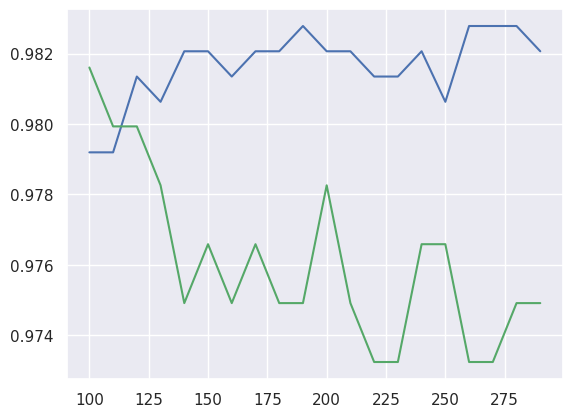

In [37]:
start=100
stop=300
passo=10

vEpochs=np.arange(start,stop,passo)
vAccTrain=[]
vAccTest=[]

for e in vEpochs:
    mlp=MLPClassifier(hidden_layer_sizes=(100,100),random_state=1, max_iter=e)
    mlp.fit(X_train_std,Y_train)
    vAccTrain.append(mlp.score(X_train_std,Y_train))
    vAccTest.append(mlp.score(X_test_std,y_test))
plt.plot(vEpochs,vAccTrain,c='b',label="Train")
plt.plot(vEpochs,vAccTest,c='g',label="Test")
plt.legend

In [39]:
model01=MLPClassifier(hidden_layer_sizes=(100,100),random_state=1,max_iter=115)
model01.fit(X_train_std,Y_train)
print("Accurratezza dati di Train: %.3f" % model01.score(X_train_std,Y_train))
print("Accurratezza dati di Test: %.3f" % model01.score(X_test_std,y_test))
print(model01.predict([caso_std]))

Accurratezza dati di Train: 0.980
Accurratezza dati di Test: 0.980
['Simmy']


/home/raffaelem5b/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (115) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/raffaelem5b/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [46]:

dump(model01,"marziani.joblib")

modelimportato=load("marziani.joblib")
print(modelimportato.predict([caso_std]))

['Simmy']


/home/raffaelem5b/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


0.9799139167862266